# Python and Baseball

Baseball data has come to us in many forms over the years.  In the early days, statistics were calculated from box scores printed in the newspapers and official scoresheets. For many years, the tools used to evaluate pitchers, hitters, and even managers were all pretty much the same.  Batting averages, On base percentages, Earned run averages, etc.  All statistics in baseball only went down so far as to look at the results of many at-bats.

But sometime in the late 70's, new interesting statistics began to take shape.  Still, the "SABRmetrics" that came from that era (which stretched into the mid-2000s), would all be based on the results of individual at-bats over some amount of time.  The data simply did not exist to look any deeper than that.  But some noteable, game-changing ideas came from that era that are being built upon still today.

Originally, I got really into baseball statistics in the early 2000's because I wanted to build a baseball game simulator.  So I read a whole lot, and came to the conclusion that while I could build one, it would be difficult to be one I could be proud of...Especially when it came to simulating the results of pitchers.  Because data at the at-bat level just wasn't good enough to answer the question of:

"When BatterX faces PitcherY, what are the probabilites of each diffent outcome?"  To get that, I thought, you really needed pitch-level data.  And that data was starting to creep into public databases at the time.  At least, results of pitches.  Not really very much data about the pitches themseves though.  I wanted to answer questions like: "What's the probability that PitcherY starts off with a fastball low and away, then given that, what's the probability for outcomes off of that pitch"


# PitchF/X

In 2007, Major League Baseball, partnering with Sportvision (the people who brought you the First-down marker in football, and that annoying hockey-puck color blob that only lasted for one season because people really hated it, even though it was a huge technical breakthrough at the time), rolled out a system of stationary video cameras at each stadium with the express purpose of tracking every single pitch.  The output from this system is a set of 9 numbers.  The results of a fit to ball-locations in each frame to a constant-acceleration trajectory.  And then they made the data public, as part of their gameday-data feed...the stuff the MLB (and others) apps use to give live game tracking.  

![title](baseball_talk/MLB_app.jpg)

Access to this data begins [here](http://gd2.mlb.com/components/game/mlb/)

http://gd2.mlb.com/components/game/mlb/

One can drill down to a single game, like so:

http://gd2.mlb.com/components/game/mlb/year_2016/month_04/day_21/gid_2016_04_21_tbamlb_bosmlb_1/ 

There's a lot of stuff there.  But the interesting things (in my opinion), are in the "innings" folder.  (We will use innings/inning_all.xml)


![title](baseball_talk/atbat.jpg)

The PitchF/X part of this exists under the < pitch\> tag.  There are 9 pitch parameters:

- x0, y0, z0:  initial position of the pitch (in $ft$, origin at tip of home plate)

* vx0, vy0, vz0: Velocity of the pitch at the initial position (in $ft/s$)

* ax, ay, az:  Acceleration of the pitch (in $ft/s^{2}$ assumed to be constant by fit)

And several derived parameters:

- start_speed, end_speed (self-explanatory)

- pfx_x, pfx_z:  The calculated "break" of each pitch.  Deviation in inches from the final location to where the pitch would have ended up had it traveled only under the influence of gravity (given the "initial conditions" of the pitch at 40 ft from home plate)

- px, pz:  These are final locations of the pitch, in feet from the origin at the front of the plate

- x, y:  These are also final locations, but measured in normalized-app-pixel units (Never use these)

- break_y, break_angle, break_length:  Another attempt to quantify break of a pitch.  Essentially describes the line segment that passes perpindicular to a straight line from release point to final point of the pitch, and intersects the point of greatest deviation from that line on the trajectory of the pitch.

![title](baseball_talk/pfx_break_from_walsh.jpg)

- pitch_type, type_confidence:  Their guess, and their confidence in their guess as to what kind of pitch that was

- spin_rate, spin_dir.  The magnitude and direction of the useful spin of the baseball.

# Parsing the XML in the simplest way
(with ElementTree)
There are likely better ways...faster ways even.  But element tree is very simple to understand.

In [7]:
#After saving the inning_all.xml file locally...
mygame_xml = open('/home/isaac/baseball_talk/inning.xml')

In [8]:
import xml.etree.ElementTree as ET
inning_tree = ET.parse(mygame_xml).getroot()
mygame_xml.close()

In [18]:
list(inning_tree)

[<Element 'inning' at 0x7fb1b2b35650>,
 <Element 'inning' at 0x7fb1b2ae98d0>,
 <Element 'inning' at 0x7fb1b2a8b710>,
 <Element 'inning' at 0x7fb1b2ab0110>,
 <Element 'inning' at 0x7fb1b2a50750>,
 <Element 'inning' at 0x7fb1b2a72110>,
 <Element 'inning' at 0x7fb1b2a18110>,
 <Element 'inning' at 0x7fb1b2a395d0>,
 <Element 'inning' at 0x7fb1b29da350>]

In [19]:
for inning in inning_tree.findall('inning'):
    print inning.attrib
    print list(inning)

{'home_team': 'bos', 'away_team': 'tba', 'num': '1', 'next': 'Y'}
[<Element 'top' at 0x7fb1b2b35690>, <Element 'bottom' at 0x7fb1b2b45910>]
{'home_team': 'bos', 'away_team': 'tba', 'num': '2', 'next': 'Y'}
[<Element 'top' at 0x7fb1b2ae9910>, <Element 'bottom' at 0x7fb1b2af9610>]
{'home_team': 'bos', 'away_team': 'tba', 'num': '3', 'next': 'Y'}
[<Element 'top' at 0x7fb1b2a8b750>, <Element 'bottom' at 0x7fb1b2a9d6d0>]
{'home_team': 'bos', 'away_team': 'tba', 'num': '4', 'next': 'Y'}
[<Element 'top' at 0x7fb1b2ab0150>, <Element 'bottom' at 0x7fb1b2abff50>]
{'home_team': 'bos', 'away_team': 'tba', 'num': '5', 'next': 'Y'}
[<Element 'top' at 0x7fb1b2a50810>, <Element 'bottom' at 0x7fb1b2a64490>]
{'home_team': 'bos', 'away_team': 'tba', 'num': '6', 'next': 'Y'}
[<Element 'top' at 0x7fb1b2a72150>, <Element 'bottom' at 0x7fb1b2a72d50>]
{'home_team': 'bos', 'away_team': 'tba', 'num': '7', 'next': 'Y'}
[<Element 'top' at 0x7fb1b2a18150>, <Element 'bottom' at 0x7fb1b2a18e90>]
{'home_team': 'bos',

In [20]:
for inning in inning_tree:
    for half in inning:
        print inning.attrib['num'], half.tag

1 top
1 bottom
2 top
2 bottom
3 top
3 bottom
4 top
4 bottom
5 top
5 bottom
6 top
6 bottom
7 top
7 bottom
8 top
8 bottom
9 top
9 bottom


In every inning, there are two halves, denoted by the tags top and bottom.  In every half there are some N (usually >= 3) atbats, with various attributes, like pitcher, hitter, final count, outs at the beginning, etc.  Right?


In [23]:
list(inning_tree[0][0])

[<Element 'atbat' at 0x7fb1b2b35790>,
 <Element 'atbat' at 0x7fb1b2b35a90>,
 <Element 'action' at 0x7fb1b2b35d90>,
 <Element 'atbat' at 0x7fb1b2b35e90>,
 <Element 'atbat' at 0x7fb1b2b35f90>,
 <Element 'atbat' at 0x7fb1b2b45390>,
 <Element 'atbat' at 0x7fb1b2b45610>]

Oh wait...there's an "action" in there...

In [24]:
inning_tree[0][0][2].tag, inning_tree[0][0][2].attrib

('action',
 {'away_team_runs': '0',
  'b': '0',
  'des': 'On-field Delay. ',
  'des_es': 'Retraso en el Terreno',
  'event': 'Game Advisory',
  'event_es': 'Aviso en el Juego',
  'event_num': '17',
  'home_team_runs': '0',
  'o': '0',
  'pitch': '0',
  'player': '446334',
  's': '0',
  'tfs': '173922',
  'tfs_zulu': '2016-04-21T17:39:22Z'})

Yeah, we don't care about on-field delays (likely an argument with an umpire)....so our parser needs to skip these.  But not necessarily all action events.  Action events will describe stolen bases, delays of any kind, coaching visits to the mound, Pitching changes and other substitutions.  Even if they happen within an at-bat, the action tag will always be outside of an at-bat (I think).

We want to process at bats...those should all have pitches in them, right?

In [26]:
list(inning_tree[0][0][1])

[<Element 'pitch' at 0x7fb1b2b35b10>,
 <Element 'pitch' at 0x7fb1b2b35bd0>,
 <Element 'pitch' at 0x7fb1b2b35b90>,
 <Element 'pitch' at 0x7fb1b2b35c90>,
 <Element 'runner' at 0x7fb1b2b35d10>,
 <Element 'runner' at 0x7fb1b2b35d50>]

Typically, the runner elements are at the end of an at-bat and mark where the runners both began the at-bat, and where they were at the end of it.  However, if there are stolen base attempts that happen during the at-bat, the runner elements will get sandwiched between pitches...right after the pitch on which the runner attempted to steal

In [28]:
inning_tree[0][0][0][0].attrib#The games first pitch

{'ax': '17.47',
 'ay': '28.57',
 'az': '-16.61',
 'break_angle': '-41.9',
 'break_length': '5.5',
 'break_y': '23.8',
 'cc': '',
 'des': 'Ball',
 'des_es': 'Bola mala',
 'end_speed': '82.0',
 'event_num': '3',
 'id': '3',
 'mt': '',
 'nasty': '70',
 'pfx_x': '10.11',
 'pfx_z': '8.96',
 'pitch_type': 'FT',
 'play_guid': '300955b8-a94e-4e35-84a7-a40202f66363',
 'px': '1.12',
 'pz': '3.33',
 'spin_dir': '131.699',
 'spin_rate': '2593.365',
 'start_speed': '89.5',
 'sv_id': '160421_133529',
 'sz_bot': '1.61',
 'sz_top': '3.5',
 'tfs': '173535',
 'tfs_zulu': '2016-04-21T17:35:35Z',
 'type': 'B',
 'type_confidence': '.788',
 'vx0': '-8.32',
 'vy0': '-130.89',
 'vz0': '-4.25',
 'x': '74.35',
 'x0': '3.03',
 'y': '148.9',
 'y0': '50.0',
 'z0': '6.22',
 'zone': '12'}

One thing we see missing from the pitch attributes is any indication of the count on which a pitch is thrown.  So if you want to do things that look at which pitches are thrown in which counts, you should probably make sure your parser keeps track of the count in an at-bat as it cycles through pitches...not terribly difficult, but something to keep in mind.

And that's the bulk of the data I collect.  There are a few, minor other things too...like the players.xml file that matches player names to their ID numbers...but this is where the interesting (to me) data all resides.


# Peewee

Because I'm not a database guy at all (seriously...I get along with SQL about as well as two things that don't get along very well), I decided to use a lightweight, relatively easy to learn ORM (or it was three years ago...it's changed since then, but still fairly simple)...called peewee.

The first step is creating my tables/models...which it makes very simple.

[www.github.com/ikehall/peewee-baseball](http://www.github.com/ikehall/peewee-baseball) (I'm just going to point here for now for what I think is easier reference.  Maybe.)

*Some notes if you want to use this to create your own database:
- First, open a python session and import mymodels
- In that python session, run mymodels.create_tables()
- Close the python session
- Edit import_to_db.py, at the bottom, to reflect the years/months you want to collect
- run import_to_db.py, and wait.  Currently, it takes 5~10 seconds per game.  One year takes several hours.
- import_to_db.py is UGLY code.  I don't like it.  I'll clean it up, and perhaps optimize it for more speed at some point.  I'm not sure when though.

In [2]:
cd peewee-baseball/peewee-baseball/


/home/isaac/peewee-baseball/peewee-baseball


In [3]:
#Peewee lets me do things like this:
from datetime import datetime
from peewee import *
from mymodels import *

In [13]:
#With peewee, I can do things like this to get at my data.
#Say I want to see all the pitches Jake Arrieta threw in 2016...(or some other date range)


gms = Games.filter(date__gt=datetime(2016,1,1), 
                   date__lt=datetime(2017,1,1))
pitches = Pitches.filter(ab__gameid__in=gms, 
                         ab__pitcher__last='Arrieta', 
                         ab__pitcher__first='Jake')
print len(pitches)

#Or all the pitches he threw at Wrigley Field
gms_wrigley = Games.filter(date__gt=datetime(2016,1,1), 
                           date__lt=datetime(2017,1,1), 
                           venue__name="Wrigley Field")
pitches_wrigley = Pitches.filter(ab__gameid__in=gms_wrigley, 
                                 ab__pitcher__last='Arrieta', 
                                 ab__pitcher__first='Jake')
print len(pitches_wrigley)

#This is, I guess, the *OLD* way...it's no longer in the documentation.  I cried. 
#I swear, it was in the docs in 2013 when I started using it...But while updating this year, I discovered
#To my horror, that there was literally ZERO mentions of this.  Not even in the API reference.
#Which probably doesn't mean good things for the way I thought I could do things 3 years ago... :\

3599
1621


In [48]:
#With the "new" way, it's a little different.  
#This is what is in the documentation now.
#If it had been like this two years ago, I may have just slogged my way through learning SQLalchemy.
#Le Sigh

alsopitches = (Pitches.select()
               .join(Atbats)
               .join(Players, on=Atbats.pitcher)
               .where(Players.last=='Arrieta', 
                      Players.first=='Jake')
               .switch(Atbats) #I just learned this part yesterday...apparently I have to switch context back to AB
               .join(Games)
               .where(Games.date > datetime(2016,1,1), 
                      Games.date<datetime(2017,1,1))
               )
print len(alsopitches)

#Now let's see what it looks like if I just want to see the pitches he threw at Wrigley field

justwrigley = (Pitches.select()
               .join(Atbats)
               .join(Players, on=Atbats.pitcher)
               .where(Players.last=='Arrieta', 
                      Players.first=='Jake')
               .switch(Atbats)
               .join(Games)
               .where(Games.date > datetime(2016,1,1), 
                      Games.date<datetime(2017,1,1))
               .join(Stadiums)
               .where(Stadiums.name=='Wrigley Field')
              )
print len(justwrigley)

3599
1621


In [58]:
#Once we have these pitches, access to other data items is simple. 
#(But there are extra queries involved unless you are smart enough to join on the right things when you query)
for pitch in justwrigley[:10]:
    print pitch.ab.batter.last,",", pitch.ab.batter.first
    
#I like this because I can select a larger subsample than I need with the queries and let python handle
#any filtering I might want later.  For instance, rather than filtering on the stadium when I query, I might
#filter it by doing
my_pitches = [x for x in pitches if x.ab.gameid.venue.name=='Wrigley Field']
print len(my_pitches)

#It's definitely not the most efficient way to go about getting the data you need...
#BUT, it has the advantage that, for an SQL-baby like me, you can get your code working first,
#And then try to clean it up later...which of course, always happens.

Adames , Cristhian
Adames , Cristhian
Adames , Cristhian
Story , Trevor
Story , Trevor
Story , Trevor
Story , Trevor
Story , Trevor
Gonzalez , Carlos
Gonzalez , Carlos
1621


In [68]:
#Lets do a little plotting now.  How about different colors for each type of pitch?
print set(p.pitch_type for p in pitches)

set([u'CH', u'IN', u'SI', None, u'FF', u'SL', u'CU'])


In [6]:
pitch_colors = {'FF':'blue','SI':'gray','SL':'red','CU':'cyan','CH':'purple','IN':'black'}

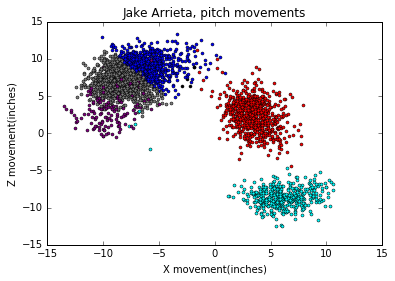

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
#Pitch movements first...
pfx_x = [p.pfx_x for p in pitches if p.pitch_type is not None]
pfx_z = [p.pfx_z for p in pitches if p.pitch_type is not None]
ptypes = tuple([pitch_colors[p.pitch_type] for p in pitches if p.pitch_type is not None])
f = plt.figure()
movements = f.add_subplot(111)
movements.set_xlabel("X movement(inches)")
movements.set_ylabel("Z movement(inches)")
movements.set_title("Jake Arrieta, pitch movements")
for i,(x,y,c) in enumerate(zip(pfx_x, pfx_z, ptypes)):
    movements.plot(x,y, color=c, marker = 'o', markersize=3)

In [96]:
#Some interesting observations...fastballs and even "sinkers" actually have upward movement!  
#Only curveballs and  have negative vertical movement (and some sliders).
#In fact, sliders are very close to 0,0...No movement?
#Also, the hard line between four-seam fastballs and sinkers seems very suspicious.
#Possibly a boundary drawn by the pitch-classification algorithm that is incorrect in this case.

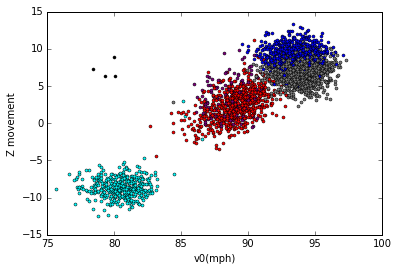

In [103]:
#Lets plot vertical movement vs velocity
import numpy as np
v_fts = np.array([[p.vx0, p.vx0, p.vy0] for p in pitches if p.vx0 is not None])
v0 = np.sqrt(np.sum(v_fts*v_fts, axis=1))/1.46666666667
f2 = plt.figure()
pfxz_v0 = f2.add_subplot(111)
pfxz_v0.set_xlabel("v0(mph)")
pfxz_v0.set_ylabel("Z movement")
for i,(x,y,c) in enumerate(zip(v0, pfx_z, ptypes)):
    pfxz_v0.plot(x,y,color=c, marker='o', markersize=3)

In [105]:
#It's interesting how the relationship here is almost a straight line...
#Also, the blue (four-seam fastballs) look more like a classification hiccup now too.
#Again, we see a nearly flat dividing line, and also note that they are
#at about the same speed as the sinkers, if not slightly slower on average.
#(Normally, a four-seam fastball is the fastest pitch a pitcher throws.  
#To get a sinker to sink, there is typically a tiny bit of velocity that must be sacrificed.)
#I would guess that all of those are really just his "fastball", and that there is no
#difference in how they are thrown.  It's quite possible that this is a park-effect.


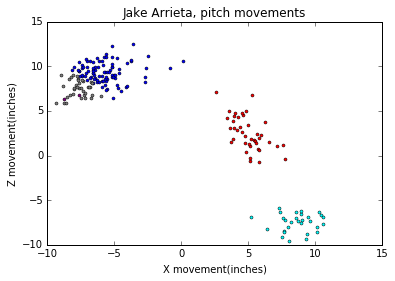

In [15]:
just_cleveland = (Pitches.select()
               .join(Atbats)
               .join(Players, on=Atbats.pitcher)
               .where(Players.last=='Arrieta', 
                      Players.first=='Jake')
               .switch(Atbats)
               .join(Games)
               .where(Games.date > datetime(2016,1,1), 
                      Games.date<datetime(2017,1,1))
               .join(Stadiums)
               .where(Stadiums.name=='Progressive Field')
              )

pfx_x = [p.pfx_x for p in just_cleveland if p.pitch_type is not None]
pfx_z = [p.pfx_z for p in just_cleveland if p.pitch_type is not None]
ptypes = tuple([pitch_colors[p.pitch_type] for p in just_cleveland if p.pitch_type is not None])
f = plt.figure()
movements = f.add_subplot(111)
movements.set_xlabel("X movement(inches)")
movements.set_ylabel("Z movement(inches)")
movements.set_title("Jake Arrieta, pitch movements")
for i,(x,y,c) in enumerate(zip(pfx_x, pfx_z, ptypes)):
    movements.plot(x,y, color=c, marker = 'o', markersize=3)

In [ ]:
#More evidence that the split between Sinker/Fourseam is not real...
#Unless he totally changed his approach for the World Series...

In [ ]:
#I really wanted to do a few things that would use ALL the pitches thrown in a given year...
#but the queries involved take a little time.

In [109]:
allpitches = (Pitches.select()
              .join(Atbats).join(Games)
              .where(Games.date > datetime(2016,1,1), 
                    Games.date<datetime(2017,1,1))
              .switch(Pitches)
              .where(Pitches.pfx_x is not None)
             )
print len(allpitches)
#Just this cell takes about 2 minutes to run

809700


So before I wrap up the prepared part of this talk, I thought I'd show a few really old results of mine.

So, it's fairly well known that the PITCHf/x system is just slightly different at each park.  And that differentness can change from year to year.  So for a lot of things someone might want to do, having "corrected" data is a thing you might want.

Several years ago, I thought it would be neat to measure the coefficient of drag on a baseball using PITCHf/x.  Past measurements never had quite the statistics to really get a good CD vs v curve, and there were hints in the research that somewhere around 80-85 mph, there was a "drag crisis".  Meaning a dip in the coefficient of drag, right in the middle of the zone in which the game is played.  PITCHf/x could only partly answer the question...Because it doesn't actually measure the force of drag at each moment...it fits to constant acceleration...which is like averaging the drag force out over the trajectory of the pitch.  So, we might expect to see a muted version of the drag crisis in the data.

Anyway, I went to look, and found this:

![title](Baseball/pfx_tree/results/ALL.gif)

So that's every pitch in 2007 (the first year of PITCHf/x), colored by the stadium in which it was thrown.  The significant banding indicates, fairly convincingly, that the ballparks are all calibrated somewhat differently.

Running a correction algorithm that was proposed by a colleague, I could make things a little better.

![title](Baseball/pfx_tree/results/ALL_kalk.gif)

Not perfect, but decent enough.

Anyway, using that, I made a plot of the "drag crisis" as best I could get from PITCHf/x
![title](Baseball/pfx_tree/results/avg.gif)

In [12]:
#Final notes:
#MLB gameday data / PITCHf/x is NOT the only baseball data out there.  There are many other databases,
#Mostly of at-bat level, and aggregate player statistical data out there. 
#Retrosheet is a popular one, as is the Lahman baseball database. 
#They do a very good job of getting historical, data into a common place that anyone can then use
#Retrosheet has, I think, games going back to the 1920s, though I believe there are some holes in their data.
